# Sales Data Analysis

### Import Necessary Libraries

In [85]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Task 1: Merging 12 months of sales data into a single file

In [12]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()
for file in files:
    sales_df = pd.read_csv(f"./Sales_Data/{file}")
    all_months_data = pd.concat([all_months_data, sales_df])

all_months_data.to_csv("all_data.csv", index=False)

### Read in updated dataframe

In [14]:
all_data = pd.read_csv("all_data.csv")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

#### Drop rows of NAN

In [52]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')

#### Find 'Or' and delete it

In [50]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to correct type

In [51]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

### Augment data with additional columns

#### Task 2: Add Month Column


In [38]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add Sales Column

In [58]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

#### Task 4: Add City Column

In [79]:
purchase_address = all_data['Purchase Address'].str.split(',')
city = address_list.str[1]
all_data['City'] = city

#### Task 5: Add Hour Column

In [111]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
hour_column = all_data['Order Date'].dt.strftime('%H')
all_data['Purchase Hour'] = hour_column

#### Question 1: What was the best month for sales? How much was earned that month?

In [61]:
monthly_sales = all_data.groupby('Month', as_index = False)['Sales'].sum()
best_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]

print("Best month for sales:", best_month['Month'])
print("Total sales in that month:", best_month['Sales'])

Best month for sales: 12.0
Total sales in that month: 4613443.34


In [62]:
monthly_sales

,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


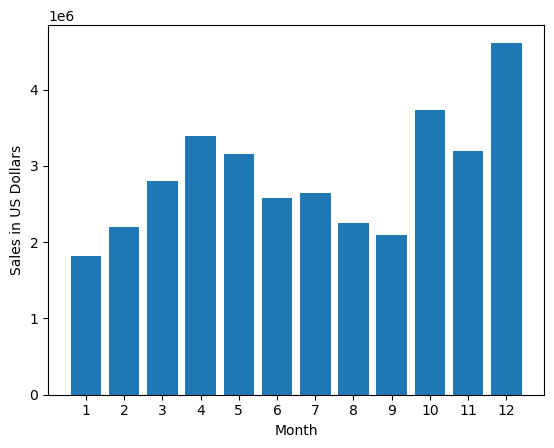

In [86]:
months = range(1,13)
plt.bar(months, monthly_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in US Dollars')
plt.xlabel('Month')

plt.show()

#### Question 2: Which US city has the highest number of sales

In [93]:
city_sales = all_data.groupby('City', as_index=False)['Sales'].sum()
best_city = city_sales.loc[city_sales['Sales'].idxmax()]

print("City with highest number of sales:", best_city['City'])
print("Total Number of Sales:", best_city['Sales'])

City with highest number of sales:  San Francisco
Total Number of Sales: 8262203.91


In [94]:
city_sales

,City,Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


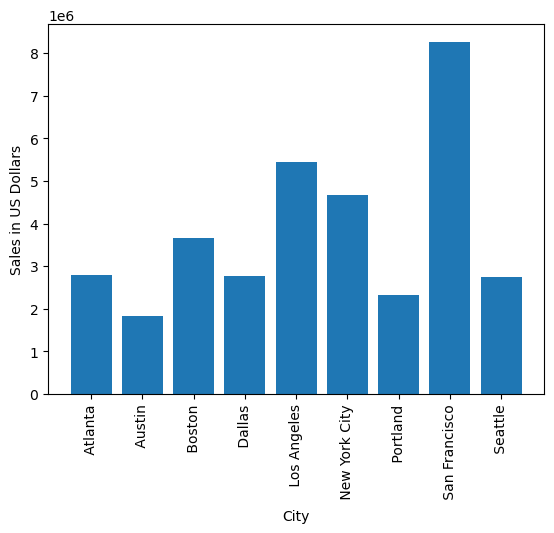

In [95]:
plt.bar(city_sales['City'], city_sales['Sales'])
plt.ylabel('Sales in US Dollars')
plt.xlabel('City')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying products?

In [118]:
# Assuming 'Price Total' contains the sales data

# Group by 'Purchase Hour' and count the number of sales
hour_sales = all_data.groupby('Purchase Hour', as_index=False)['Sales'].sum()

# Find the hour with the highest number of sales
best_hour = hour_sales.loc[hour_sales['Sales'].idxmax()]

print("Hour with highest number of sales:", best_hour['Purchase Hour'])
print("Total Number of Sales:", best_hour['Sales'])


Hour with highest number of sales: 19
Total Number of Sales: 2412938.54


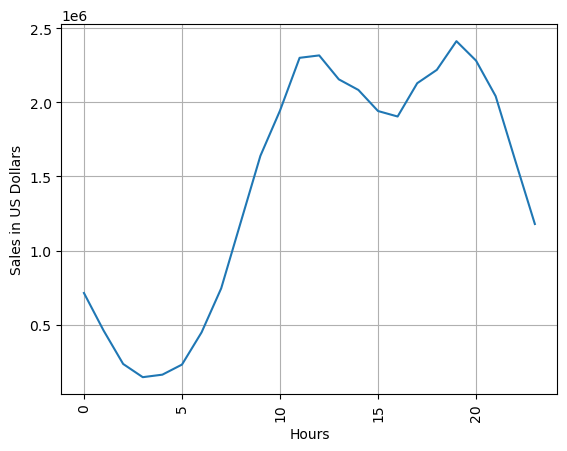

In [122]:
hours = range(0,24)
plt.plot(hours, hour_sales['Sales'])
plt.ylabel('Sales in US Dollars')
plt.xlabel('Hours')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid()
plt.show()

#### Question 4: What products are most often sold together?

In [129]:
duplicate_orders = all_data.groupby('Order ID').filter(lambda x: len(x) > 1)
duplicate_order_products = duplicate_orders.groupby('Order ID')['Product'].apply(list)

In [130]:
duplicate_order_products

Order ID
141275             [USB-C Charging Cable, Wired Headphones]
141290    [Apple Airpods Headphones, AA Batteries (4-pack)]
141365                  [Vareebadd Phone, Wired Headphones]
141384                 [Google Phone, USB-C Charging Cable]
141450           [Google Phone, Bose SoundSport Headphones]
                                ...                        
319536               [Macbook Pro Laptop, Wired Headphones]
319556                     [Google Phone, Wired Headphones]
319584                           [iPhone, Wired Headphones]
319596                   [iPhone, Lightning Charging Cable]
319631    [34in Ultrawide Monitor, Lightning Charging Ca...
Name: Product, Length: 7136, dtype: object

In [132]:
from itertools import combinations
from collections import Counter

# Group the data by OrderId and collect the products for each order
order_groups = duplicate_orders.groupby('Order ID')['Product'].apply(list)

# Initialize an empty list to store the combinations of products
product_combinations = []

# Iterate over each order's products and append combinations to the list
for products in order_groups:
    product_combinations.extend(combinations(products, 2))  # Change the number (2) for different combination lengths

# Count the occurrences of each combination
combination_counts = Counter(product_combinations)

# Get the most common combinations and their counts
most_common_combinations = combination_counts.most_common()

# Print the most common combinations
for combination, count in most_common_combinations:
    print(f"Combination: {combination}, Count: {count}")


Combination: ('iPhone', 'Lightning Charging Cable'), Count: 1005
Combination: ('Google Phone', 'USB-C Charging Cable'), Count: 987
Combination: ('iPhone', 'Wired Headphones'), Count: 447
Combination: ('Google Phone', 'Wired Headphones'), Count: 414
Combination: ('Vareebadd Phone', 'USB-C Charging Cable'), Count: 361
Combination: ('iPhone', 'Apple Airpods Headphones'), Count: 360
Combination: ('Google Phone', 'Bose SoundSport Headphones'), Count: 220
Combination: ('USB-C Charging Cable', 'Wired Headphones'), Count: 160
Combination: ('Vareebadd Phone', 'Wired Headphones'), Count: 143
Combination: ('Lightning Charging Cable', 'Wired Headphones'), Count: 92
Combination: ('Lightning Charging Cable', 'Apple Airpods Headphones'), Count: 81
Combination: ('Vareebadd Phone', 'Bose SoundSport Headphones'), Count: 80
Combination: ('USB-C Charging Cable', 'Bose SoundSport Headphones'), Count: 77
Combination: ('Apple Airpods Headphones', 'Wired Headphones'), Count: 69
Combination: ('Lightning Chargi

#### Question 6: What products sold the most? Why do you think it sold the most?

In [145]:
product_quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()
product_quantity_ordered_df = pd.DataFrame(product_quantity_ordered).reset_index()  # Reset index
product_quantity_ordered_df.head()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


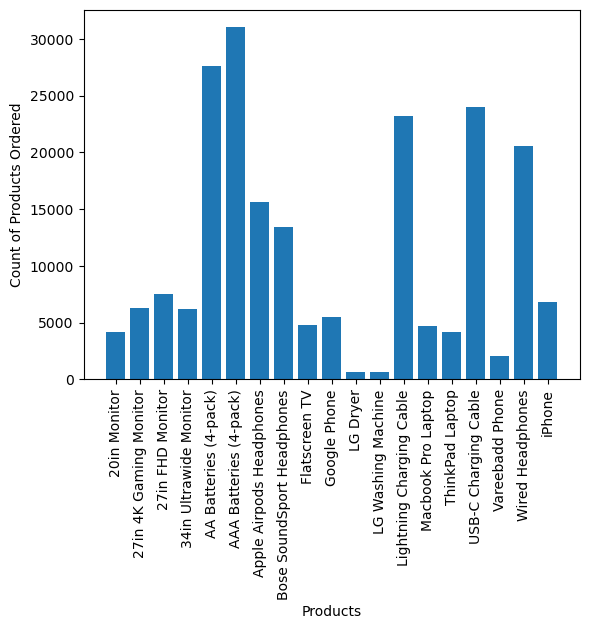

In [147]:
plt.bar(product_quantity_ordered_df['Product'], product_quantity_ordered_df['Quantity Ordered'])  
plt.ylabel('Count of Products Ordered')
plt.xlabel('Products')
plt.xticks(rotation=90)  
plt.show()
